### Visualize random samples

Don't forget to update all paths

In [4]:
import json, random, time, os, base64
import numpy as np
from pprint import pprint
from collections import Counter, defaultdict
import cv2
import matplotlib.pyplot as plt
np.set_printoptions(precision=4)
from PIL import Image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
from io import BytesIO

In [5]:
#dataset = json.load(open("/home/yingshac/CYS/WebQnA/WebQnA_data_new/WebQA_train_val.json", "r"))
dataset = json.load(open("/Users/aavi/Desktop/11-777-Project/Data/WebQA_train_val.json", "r"))
print(Counter([dataset[k]['split'] for k in dataset]))
print(len(set([dataset[k]['Guid'] for k in dataset])))
print(Counter([dataset[k]['Qcate'] for k in dataset]))
#create a json file similar to WebQnA_train_val.json for validation set and contains 10 questions with images


Counter({'train': 36766, 'val': 4966})
41732
Counter({'text': 20267, 'YesNo': 7320, 'Others': 5412, 'choose': 4220, 'number': 2118, 'color': 1830, 'shape': 565})


In [6]:
with open("/Users/aavi/Desktop/11-777-Project/Data/imgs.lineidx", "r") as fp_lineidx:
    lineidx = [int(i.strip()) for i in fp_lineidx.readlines()]


Q =  "Does a Estonian 6-stringed kannel and an Irish Bouzouki have the same number of strings?"

A =
['"An Estonian 6-stringed kannel and an Irish Bouzouki do not have the same '
 'number of strings."']

------ Positive Evidence ------ 
30023966 30023966
https://commons.wikimedia.org/wiki/File:Irish_Bouzouki.jpg
Caption =  Irish Bouzouki
30263062 30263062
https://commons.wikimedia.org/wiki/File:V%C3%A4ikekannel.jpg
Caption =  Väikekannel Estonian 6-stringed kannel made by Rait Pihlap in 2008.

------ Negative Evidence ------ 
BouzoukiFront
https://upload.wikimedia.org/wikipedia/commons/thumb/b/be/BouzoukiFront.jpg/800px-BouzoukiFront.jpg
Bouzouki tetrachordo
https://upload.wikimedia.org/wikipedia/commons/thumb/4/4d/Bouzouki_tetrachordo.jpg/800px-Bouzouki_tetrachordo.jpg
First Irish Bouzouki Lunny Abnett.png First Irish Bouzouki designed and commissioned by Donal Lunny and created by Peter Abnett
https://upload.wikimedia.org/wikipedia/commons/a/ac/First_Irish_Bouzouki_Lunny_Abnett.png
"

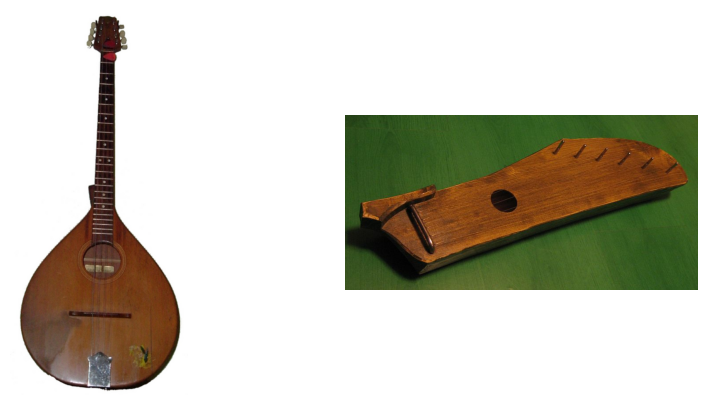

In [7]:
### Image-based queries
show_distractors = True
Qcate = ['color', 'shape', 'number', 'choose', 'YesNo', 'Others']
s=0
A=[]
for k in dataset:
    #if dataset[k]['Qcate'] in Qcate and dataset[k]['split'] == 'test':
    if (not dataset[k]['Qcate'] == 'text'):
        A.append(k)
        s=s+1
        if s==10:
            break

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
print("Q = ", dataset[k]['Q'])
print("\nA =")
pprint(dataset[k]['A'])
print("\n------ Positive Evidence ------ ")
for ax, f in zip(axes.ravel(), dataset[k]['img_posFacts']):
    image_id = f['image_id']
    with open("/Users/aavi/Desktop/11-777-Project/Data/imgs.tsv", "r") as fp:
        fp.seek(lineidx[int(image_id)%10000000])
        imgid, img_base64 = fp.readline().strip().split('\t')
    print(image_id, imgid) # image_id in dataset file and image_id in img file should agree
    im = Image.open(BytesIO(base64.b64decode(img_base64)))
    ax.imshow(im)
    ax.axis('off')
    print(f['url'])
    print("Caption = ", f['caption'])
axes.ravel()[-1].axis('off') # hide the second plot if there is only one positive img
if show_distractors:
    print("\n------ Negative Evidence ------ ")
    for f in dataset[k]['img_negFacts']:
        print(f['caption'])
        print(f['imgUrl'])
    for f in dataset[k]['txt_negFacts']:
        print(f['fact'])

Q =  "Are both the National Museum of the American Indian in Washington, D.C. and the Xanadu House in Kissimmee, Florida the same color?"

A =
['"Yes, both the National Museum of the American Indian in Washington, D.C. '
 'and the Xanadu House in Kissimmee, Florida are beige."']

------ Positive Evidence ------ 
30321533 30321533
https://commons.wikimedia.org/wiki/File:National_Museum_of_the_American_Indian_in_Washington%2C_D.C.jpg
Caption =  National Museum of the American Indian in Washington, D.C
30278153 30278153
https://commons.wikimedia.org/wiki/File:Xanadu-House-in-Kissimmee-Florida-1985.jpg
Caption =  Xanadu-House-in-Kissimmee-Florida-1985 A photo of the Xanadu House that was located in Kissimmee, Florida, showing the exterior of the house.

------ Negative Evidence ------ 
National Museum of the American Indian
https://upload.wikimedia.org/wikipedia/commons/thumb/2/25/National_Museum_of_the_American_Indian.jpg/450px-National_Museum_of_the_American_Indian.jpg
Xanadu - futuristi

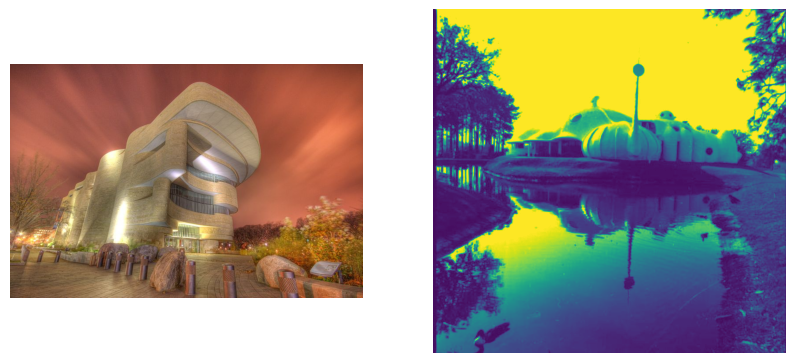

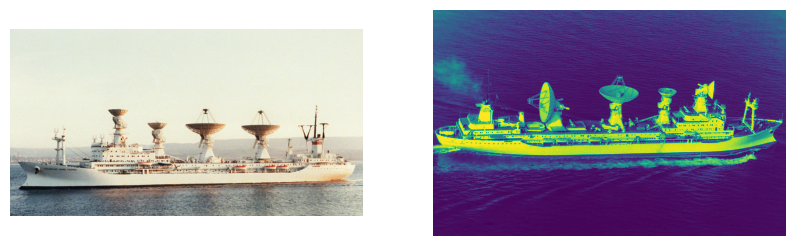

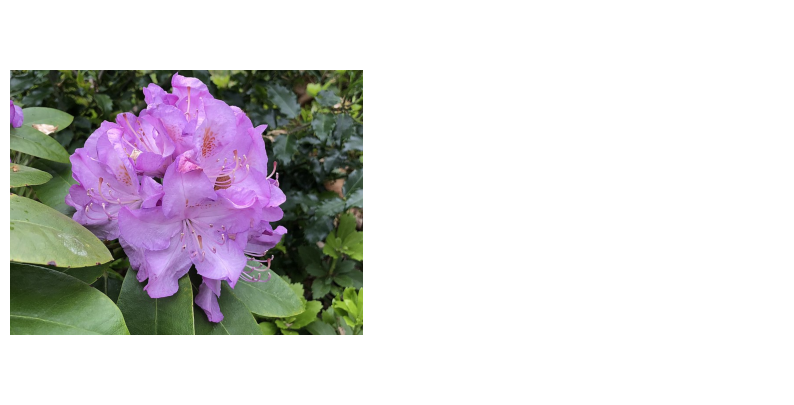

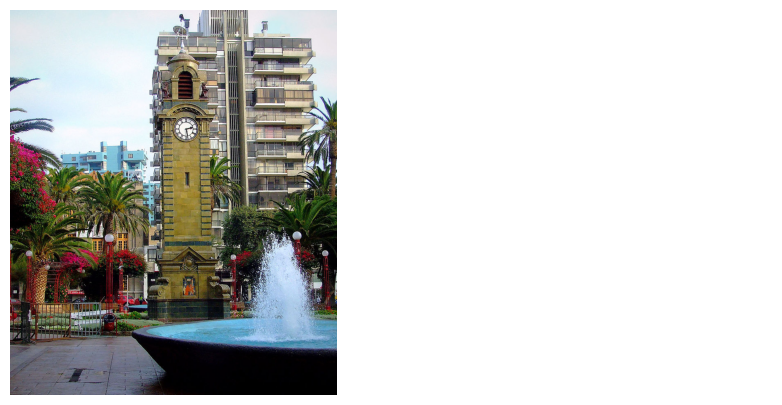

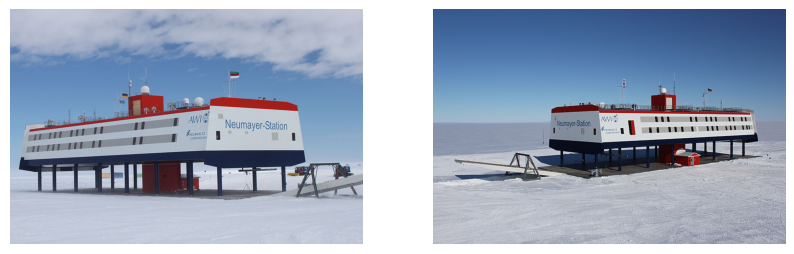

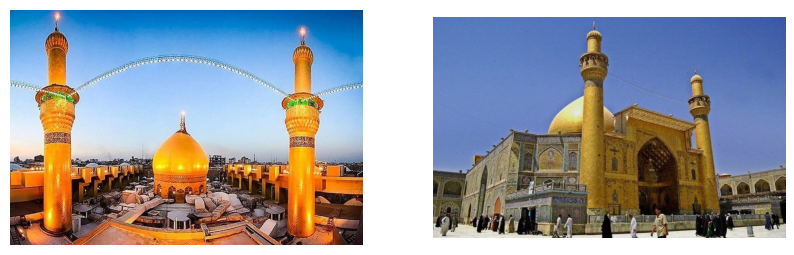

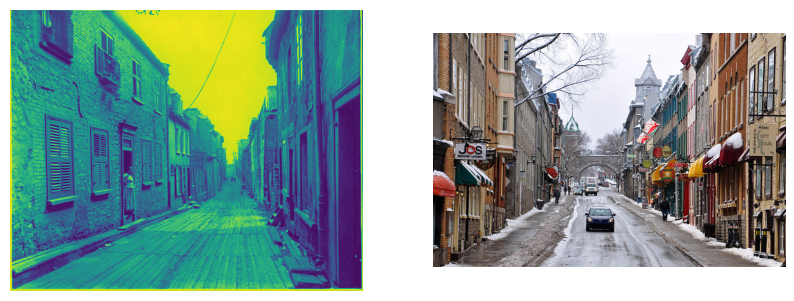

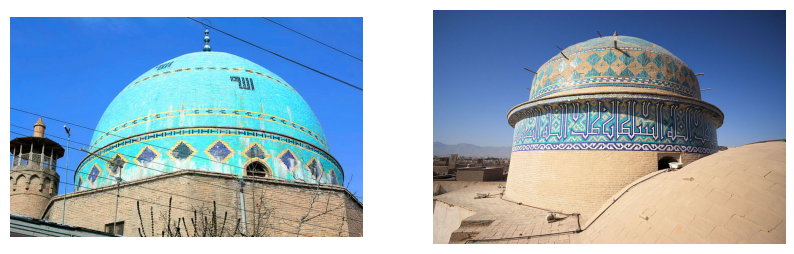

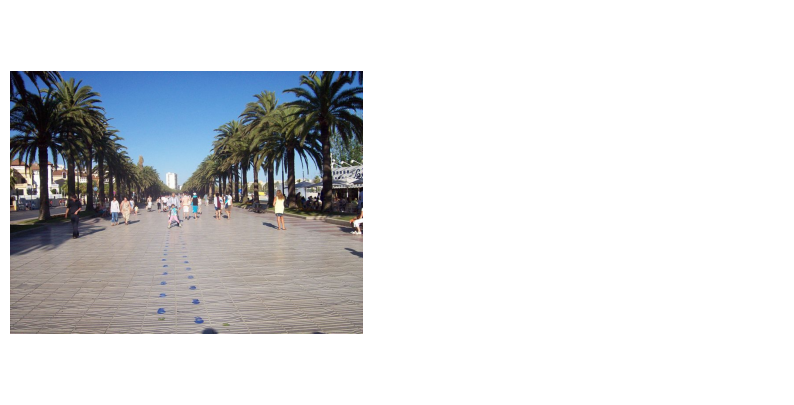

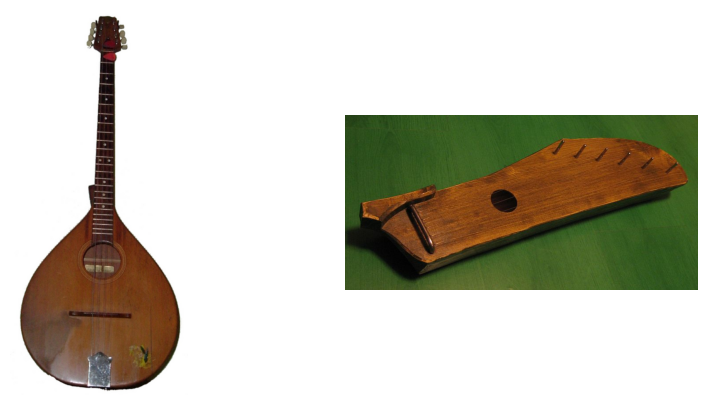

In [9]:
for k in A:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    print("Q = ", dataset[k]['Q'])
    print("\nA =")
    pprint(dataset[k]['A'])
    print("\n------ Positive Evidence ------ ")
    for ax, f in zip(axes.ravel(), dataset[k]['img_posFacts']):
        image_id = f['image_id']
        with open("/Users/aavi/Desktop/11-777-Project/Data/imgs.tsv", "r") as fp:
            fp.seek(lineidx[int(image_id)%10000000])
            imgid, img_base64 = fp.readline().strip().split('\t')
        print(image_id, imgid) # image_id in dataset file and image_id in img file should agree
        im = Image.open(BytesIO(base64.b64decode(img_base64)))
        ax.imshow(im)
        ax.axis('off')
        print(f['url'])
        print("Caption = ", f['caption'])
    axes.ravel()[-1].axis('off') # hide the second plot if there is only one positive img
    if show_distractors:
        print("\n------ Negative Evidence ------ ")
        for f in dataset[k]['img_negFacts']:
            print(f['caption'])
            print(f['imgUrl'])
        for f in dataset[k]['txt_negFacts']:
            print(f['fact'])

In [10]:
#create a json file similar to WebQnA_train_val.json for all values in the list A
dataset_new = {}
for k in A:
    dataset_new[k] = dataset[k]

In [11]:
# find all the image ids in the dataset_new
image_ids = []
for k in dataset_new:
    for f in dataset_new[k]['img_posFacts']:
        image_ids.append(f['image_id'])
    for f in dataset_new[k]['img_negFacts']:
        image_ids.append(f['image_id'])

In [12]:
#save dataset_new to a json file
with open("/Users/aavi/Desktop/11-777-Project/Data/WebQA_avi.json", "w") as fp:
    json.dump(dataset_new, fp, indent=4)

In [18]:
type(image_ids[0])

int

In [20]:
import base64
from PIL import Image
from io import BytesIO
from tqdm import tqdm

failed_ids = []
# Create a list of image IDs you want to download
image_ids_to_download = image_ids  # Replace with your desired image IDs

with open("/Users/aavi/Desktop/11-777-Project/Data/imgs.tsv", "r") as f:
    for line in tqdm(f):
        try:
            img_id, img = line.strip().split('\t')
            if int(img_id) in image_ids_to_download:
                img = Image.open(BytesIO(base64.b64decode(img)))
                img = img.convert('RGB')
                img.save('/Users/aavi/Desktop/11-777-Project/Data/Images_avi/' + img_id + '.jpg')
                
        except Exception as e:
            failed_ids.append(img_id)
            print(f"Failed to process image ID {img_id}: {str(e)}")

print("Failed to download images for the following IDs:", failed_ids)



389750it [01:42, 3820.65it/s]

Failed to download images for the following IDs: []


In [23]:
# read a json file and for each datapoint replecate it and can remove on of the image positive facts
import json
import random
import gdown
import os
dataset = json.load(open("/Users/aavi/Desktop/11-777-Project/Data/WebQA_aaaa.json", "r"))
print(len(dataset))
dataset_new1 = {}
for k in dataset:
    dataset_new1[k] = dataset[k]
    dataset_new1[k]['img_posFacts'] = dataset_new1[k]['img_posFacts'][0]

#save dataset_new1 to a json file
with open("/Users/aavi/Desktop/11-777-Project/Data/WebQA_aaaa1.json", "w") as fp:
    json.dump(dataset_new1, fp, indent=4)


10


In [28]:
import json
import random
import gdown
import os
dataset = json.load(open("/Users/aavi/Desktop/11-777-Project/Data/WebQA_aaaa.json", "r"))
print(len(dataset))
dataset_new1 = {}
for k in dataset:
    dataset_new1[k] = dataset[k]
    dataset_new1[k]['img_posFacts'] = dataset_new1[k]['img_posFacts'][1:2]

#save dataset_new1 to a json file
with open("/Users/aavi/Desktop/11-777-Project/Data/WebQA_aaaa2.json", "w") as fp:
    json.dump(dataset_new1, fp, indent=4)

10


In [ ]:
print(len(dataset))

